<div style="background-color:#9dedde; padding: 20px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 1000)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Chargement des données</b>
    </h2>
</div>


In [2]:
df= pd.read_csv('app_train_clean.csv')

In [3]:
df.shape

(307511, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TOTAL_CREDIT            307511 non-null  float64
 1   SOURCE_EXTERNE_3        246546 non-null  float64
 2   REVENU_TOTAL            307511 non-null  float64
 3   TYPE_REVENUS            307511 non-null  object 
 4   TYPE_CONTRAT            307511 non-null  object 
 5   CIBLE                   307511 non-null  int64  
 6   REMB_MENSUEL            307499 non-null  float64
 7   DATE_DEBUT_TRAVAIL      307511 non-null  object 
 8   JOURS_EMPLOI            307511 non-null  int64  
 9   CNT_FAM_MEMBERS         307509 non-null  float64
 10  NIVEAU_EDUCATION        307511 non-null  object 
 11  ID_CLIENT               307511 non-null  int64  
 12  STATUT_FAMILIAL         307511 non-null  object 
 13  MONTANT_PRIX_BIENS      307233 non-null  float64
 14  PROPRIETAIRE_VOITURE

In [5]:
df.dtypes

TOTAL_CREDIT              float64
SOURCE_EXTERNE_3          float64
REVENU_TOTAL              float64
TYPE_REVENUS               object
TYPE_CONTRAT               object
CIBLE                       int64
REMB_MENSUEL              float64
DATE_DEBUT_TRAVAIL         object
JOURS_EMPLOI                int64
CNT_FAM_MEMBERS           float64
NIVEAU_EDUCATION           object
ID_CLIENT                   int64
STATUT_FAMILIAL            object
MONTANT_PRIX_BIENS        float64
PROPRIETAIRE_VOITURE       object
PROPRIETAIRE_BIEN_IMMO     object
SOURCE_EXTERNE_2          float64
DATE_NAISSANCE             object
AGE                         int64
GENRE                      object
dtype: object

In [6]:
df.tail()

,TOTAL_CREDIT,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_CONTRAT,CIBLE,REMB_MENSUEL,DATE_DEBUT_TRAVAIL,JOURS_EMPLOI,CNT_FAM_MEMBERS,NIVEAU_EDUCATION,ID_CLIENT,STATUT_FAMILIAL,MONTANT_PRIX_BIENS,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,DATE_NAISSANCE,AGE,GENRE
307506,254700.0,NaN,157500.0,Working,Cash loans,0,27558.0,13/03/2023,-236,1.0,Secondary / secondary special,456251,Separated,225000.0,N,N,0.681632,1998-04-22,25,M
307507,269550.0,NaN,72000.0,Pensioner,Cash loans,0,12001.5,26/09/1854,365243,1.0,Secondary / secondary special,456252,Widow,225000.0,N,Y,0.115992,1966-12-18,57,F
307508,677664.0,0.218859,153000.0,Working,Cash loans,0,29979.0,26/02/2002,-7921,1.0,Higher education,456253,Separated,585000.0,N,Y,0.535722,1982-11-13,41,F
307509,370107.0,0.661024,171000.0,Commercial associate,Cash loans,1,20205.0,27/09/2010,-4786,2.0,Secondary / secondary special,456254,Married,319500.0,N,Y,0.514163,1991-02-04,32,F
307510,675000.0,0.113922,157500.0,Commercial associate,Cash loans,0,49117.5,21/05/2020,-1262,2.0,Higher education,456255,Married,675000.0,N,N,0.708569,1977-09-10,46,F


In [7]:
df.head()

,TOTAL_CREDIT,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_CONTRAT,CIBLE,REMB_MENSUEL,DATE_DEBUT_TRAVAIL,JOURS_EMPLOI,CNT_FAM_MEMBERS,NIVEAU_EDUCATION,ID_CLIENT,STATUT_FAMILIAL,MONTANT_PRIX_BIENS,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,DATE_NAISSANCE,AGE,GENRE
0,406597.5,0.139376,202500.0,Working,Cash loans,1,24700.5,05/02/2022,-637,1.0,Secondary / secondary special,100002,Single / not married,351000.0,N,Y,0.262949,1997-12-09,26,M
1,1293502.5,NaN,270000.0,State servant,Cash loans,0,35698.5,03/08/2020,-1188,2.0,Higher education,100003,Married,1129500.0,N,N,0.622246,1977-12-10,46,F
2,135000.0,0.729567,67500.0,Working,Revolving loans,0,6750.0,24/03/2023,-225,1.0,Secondary / secondary special,100004,Single / not married,135000.0,Y,Y,0.555912,1971-09-12,52,M
3,312682.5,NaN,135000.0,Working,Cash loans,0,29686.5,10/07/2015,-3039,2.0,Secondary / secondary special,100006,Civil marriage,297000.0,N,Y,0.650442,1971-10-23,52,F
4,513000.0,NaN,121500.0,Working,Cash loans,0,21865.5,11/07/2015,-3038,1.0,Secondary / secondary special,100007,Single / not married,513000.0,N,Y,0.322738,1969-04-09,54,M


<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features numériques</b>
    </h2>
</div>


<AxesSubplot:>

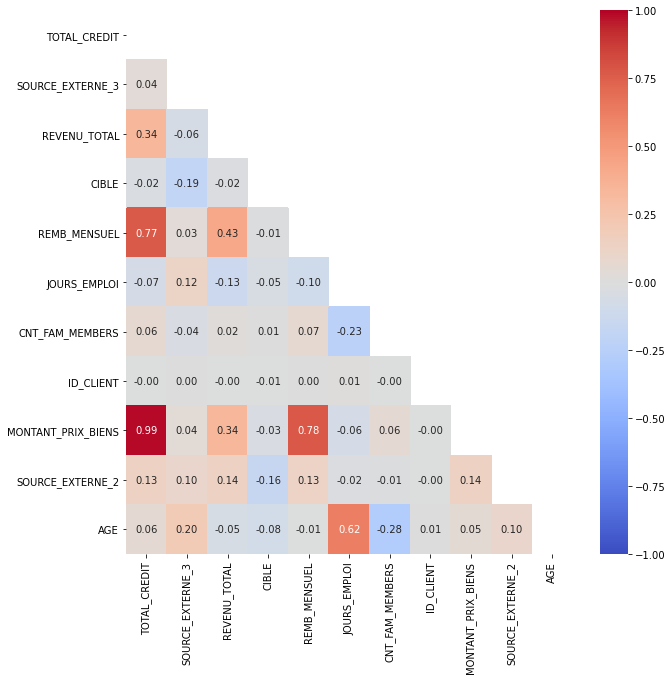

In [8]:
fig = plt.subplots(1,1,figsize = (10,10))
corr = df.sample(frac =0.1).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot = True, cmap ='coolwarm', vmin = -1,vmax =1, mask=mask, fmt ='.2f' )



In [9]:
df.CIBLE.value_counts()

0    282686
1     24825
Name: CIBLE, dtype: int64

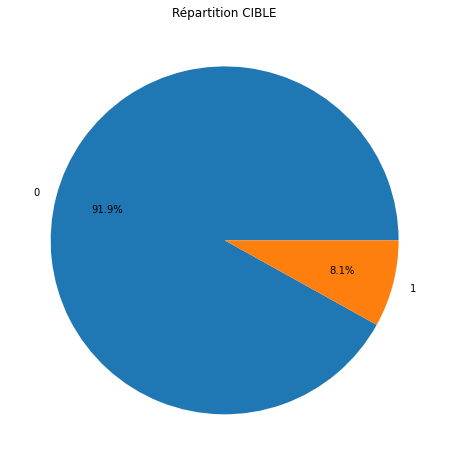

In [10]:
note_pie = df['CIBLE'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels= note_pie.index, autopct='%1.1f%%', pctdistance=0.7)
plt.title('Répartition CIBLE')
plt.show() 

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Jours Emploi</b>
    </h2>
</div>


In [11]:
print('Date de l employé le plus récent :' , df.DATE_DEBUT_TRAVAIL.max())
print('Date de l employé le plus ancien :' ,df.DATE_DEBUT_TRAVAIL.min())


Date de l employé le plus récent : 31/12/2022
Date de l employé le plus ancien : 01/01/1987


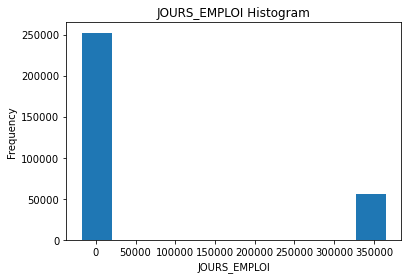

In [12]:
df['JOURS_EMPLOI'].plot.hist(title = 'JOURS_EMPLOI Histogram');
plt.xlabel('JOURS_EMPLOI');

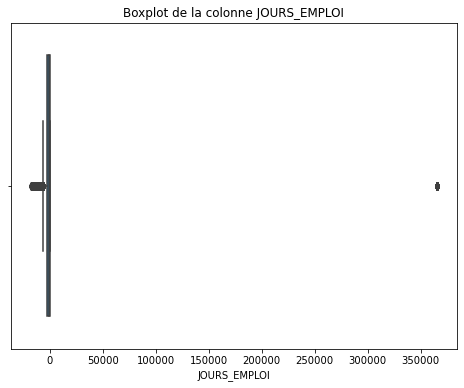

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['JOURS_EMPLOI'])
plt.title('Boxplot de la colonne JOURS_EMPLOI')
plt.show()

In [14]:
df['JOURS_EMPLOI'].max()

365243

In [15]:
df['JOURS_EMPLOI'].min()

-17912

In [16]:
defaut_anomalie = df[(df['JOURS_EMPLOI'] == 365243) & (df['CIBLE'] == 1)]

In [17]:
defaut_anomalie

,TOTAL_CREDIT,SOURCE_EXTERNE_3,REVENU_TOTAL,TYPE_REVENUS,TYPE_CONTRAT,CIBLE,REMB_MENSUEL,DATE_DEBUT_TRAVAIL,JOURS_EMPLOI,CNT_FAM_MEMBERS,NIVEAU_EDUCATION,ID_CLIENT,STATUT_FAMILIAL,MONTANT_PRIX_BIENS,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,SOURCE_EXTERNE_2,DATE_NAISSANCE,AGE,GENRE
81,252000.0,0.720944,81000.0,Pensioner,Cash loans,1,14593.5,26/09/1854,365243,2.0,Secondary / secondary special,100096,Married,252000.0,N,Y,0.023952,1955-12-17,68,F
283,284400.0,NaN,36000.0,Pensioner,Cash loans,1,10849.5,26/09/1854,365243,2.0,Secondary / secondary special,100326,Civil marriage,225000.0,Y,Y,0.063455,1963-05-25,60,M
344,417024.0,0.115387,112500.0,Pensioner,Cash loans,1,25330.5,26/09/1854,365243,1.0,Secondary / secondary special,100396,Single / not married,360000.0,N,N,0.293988,1986-04-25,37,M
348,343683.0,NaN,202500.0,Pensioner,Cash loans,1,16663.5,26/09/1854,365243,1.0,Secondary / secondary special,100401,Separated,261000.0,N,Y,0.622575,1968-07-15,55,F
586,808650.0,NaN,112500.0,Pensioner,Cash loans,1,26217.0,26/09/1854,365243,2.0,Secondary / secondary special,100672,Married,675000.0,N,Y,0.220481,1966-01-20,57,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307283,306306.0,0.275000,130500.0,Pensioner,Cash loans,1,13108.5,26/09/1854,365243,2.0,Secondary / secondary special,456000,Married,247500.0,Y,Y,0.168086,1962-06-07,61,M
307310,490536.0,0.445396,90000.0,Pensioner,Cash loans,1,23989.5,26/09/1854,365243,2.0,Secondary / secondary special,456034,Married,405000.0,N,Y,0.005430,1962-05-07,61,M
307363,663093.0,0.360613,29250.0,Pensioner,Cash loans,1,21519.0,26/09/1854,365243,2.0,Secondary / secondary special,456088,Married,553500.0,Y,Y,0.266520,1968-11-06,55,F
307386,221832.0,0.176653,135000.0,Pensioner,Cash loans,1,17653.5,26/09/1854,365243,1.0,Secondary / secondary special,456112,Widow,175500.0,N,Y,0.200589,1967-09-27,56,F


In [18]:
defaut_anomalie[['CIBLE', 'AGE', 'DATE_DEBUT_TRAVAIL', 'TOTAL_CREDIT','REMB_MENSUEL' ]]

,CIBLE,AGE,DATE_DEBUT_TRAVAIL,TOTAL_CREDIT,REMB_MENSUEL
81,1,68,26/09/1854,252000.0,14593.5
283,1,60,26/09/1854,284400.0,10849.5
344,1,37,26/09/1854,417024.0,25330.5
348,1,55,26/09/1854,343683.0,16663.5
586,1,57,26/09/1854,808650.0,26217.0
...,...,...,...,...,...
307283,1,61,26/09/1854,306306.0,13108.5
307310,1,61,26/09/1854,490536.0,23989.5
307363,1,55,26/09/1854,663093.0,21519.0
307386,1,56,26/09/1854,221832.0,17653.5


In [19]:
df['DATE_DEBUT_TRAVAIL'].value_counts()

26/09/1854    55374
18/04/2023      156
25/03/2023      152
19/04/2023      151
19/03/2023      151
              ...  
23/05/1991        1
03/12/1989        1
15/09/1996        1
22/09/1996        1
28/09/2006        1
Name: DATE_DEBUT_TRAVAIL, Length: 12574, dtype: int64

In [20]:
df = df[df['DATE_DEBUT_TRAVAIL'] != '25/09/1854']

In [21]:
df['DATE_DEBUT_TRAVAIL'].value_counts()

26/09/1854    55374
18/04/2023      156
25/03/2023      152
19/04/2023      151
19/03/2023      151
              ...  
23/05/1991        1
03/12/1989        1
15/09/1996        1
22/09/1996        1
28/09/2006        1
Name: DATE_DEBUT_TRAVAIL, Length: 12574, dtype: int64

In [22]:
defaut_anom = df[(df['JOURS_EMPLOI'] < 365243) & (df['CIBLE'] == 1)]

In [23]:
defaut_anom[['CIBLE', 'AGE', 'DATE_DEBUT_TRAVAIL', 'TOTAL_CREDIT','REMB_MENSUEL' ]]

,CIBLE,AGE,DATE_DEBUT_TRAVAIL,TOTAL_CREDIT,REMB_MENSUEL
0,1,26,05/02/2022,406597.5,24700.5
26,1,51,24/08/2016,979992.0,27076.5
40,1,48,21/05/2020,1193580.0,35028.0
42,1,36,29/12/2013,288873.0,16258.5
94,1,28,29/04/2018,953460.0,64107.0
...,...,...,...,...,...
307448,1,27,01/07/2015,450000.0,32746.5
307475,1,36,04/04/2017,1303200.0,46809.0
307481,1,56,24/03/2015,297000.0,19975.5
307489,1,45,22/01/2023,521280.0,23089.5


<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Age</b>
    </h2>
</div>


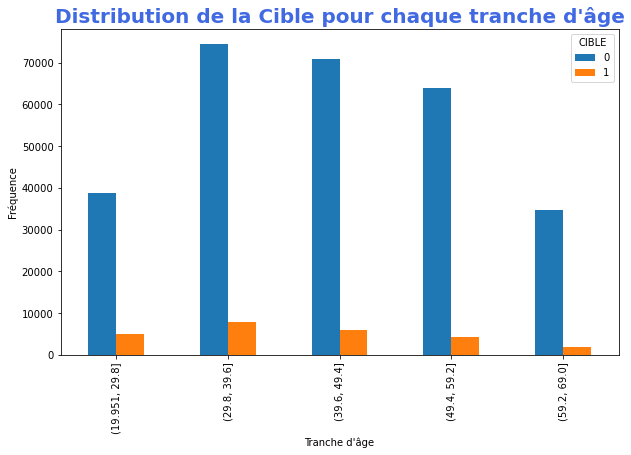

In [24]:
age_group_cible = df.groupby([pd.cut(df['AGE'], bins=5), 'CIBLE']).size().unstack()

age_group_cible.plot(kind='bar', stacked=False, figsize=(10,6))
plt.xlabel('Tranche d\'âge')
plt.ylabel('Fréquence')
plt.title('Distribution de la Cible pour chaque tranche d\'âge', fontsize = 20, fontweight ='bold', color="RoyalBlue")
plt.legend(title='CIBLE', labels=['0', '1'])
plt.show()


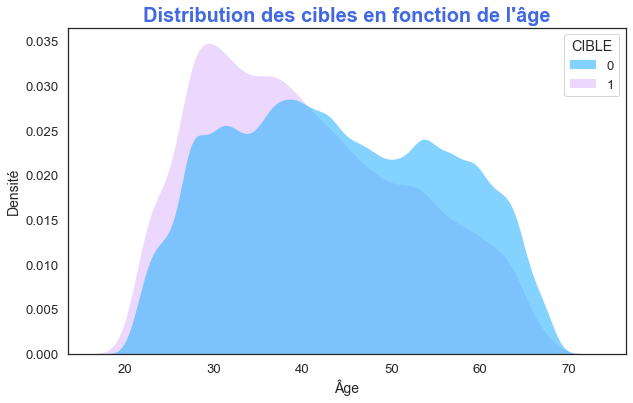

In [25]:
custom_colors = ["#33b4ff", "#debefa"]  # Définir des couleurs personnalisées


sns.set(style="white", palette=custom_colors, font_scale=1.2)


plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="AGE", hue="CIBLE", fill=True, common_norm=False, alpha=0.6, linewidth=0)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.title('Distribution des cibles en fonction de l\'âge', fontsize = 20, fontweight ='bold', color="RoyalBlue")
plt.grid(False)  # Retirer la grille
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 600px;">
    <h2>
        <b> Relation Cible x Nombre membre de la famille</b>
    </h2>
</div>


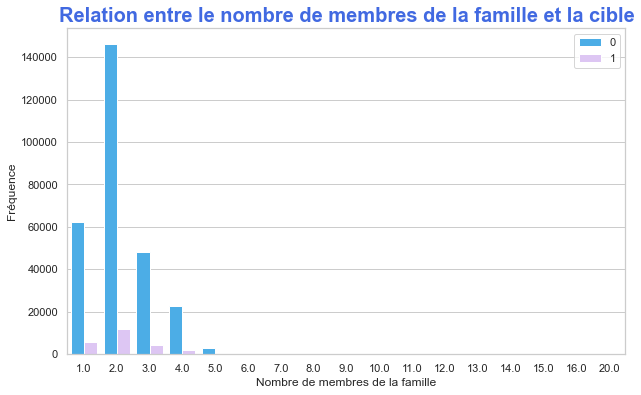

In [26]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="CNT_FAM_MEMBERS", hue="CIBLE", data=df, palette=custom_palette)

# Ajouter des titres et des étiquettes
plt.xlabel('Nombre de membres de la famille')
plt.ylabel('Fréquence')
plt.title('Relation entre le nombre de membres de la famille et la cible', fontsize=20, fontweight='bold', color="RoyalBlue")
plt.legend(loc='upper right')
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Total Credit</b>
    </h2>
</div>


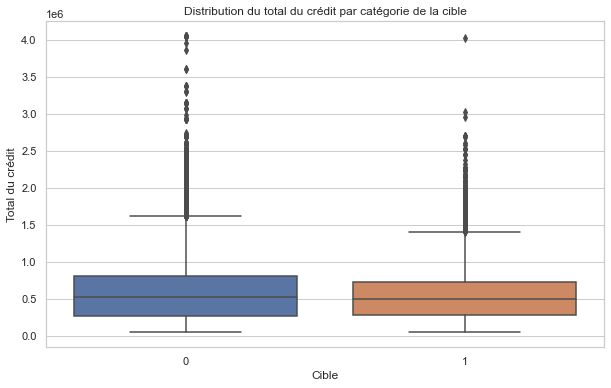

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CIBLE", y="TOTAL_CREDIT", data=df)
plt.title('Distribution du total du crédit par catégorie de la cible')
plt.xlabel('Cible')
plt.ylabel('Total du crédit')
plt.show()

In [28]:
df['TOTAL_CREDIT'].describe().T

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: TOTAL_CREDIT, dtype: float64

In [29]:
df.columns.tolist()

['TOTAL_CREDIT',
 'SOURCE_EXTERNE_3',
 'REVENU_TOTAL',
 'TYPE_REVENUS',
 'TYPE_CONTRAT',
 'CIBLE',
 'REMB_MENSUEL',
 'DATE_DEBUT_TRAVAIL',
 'JOURS_EMPLOI',
 'CNT_FAM_MEMBERS',
 'NIVEAU_EDUCATION',
 'ID_CLIENT',
 'STATUT_FAMILIAL',
 'MONTANT_PRIX_BIENS',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'SOURCE_EXTERNE_2',
 'DATE_NAISSANCE',
 'AGE',
 'GENRE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features catégorielles</b>
    </h2>
</div>


<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Biens immo</b>
    </h2>
</div>


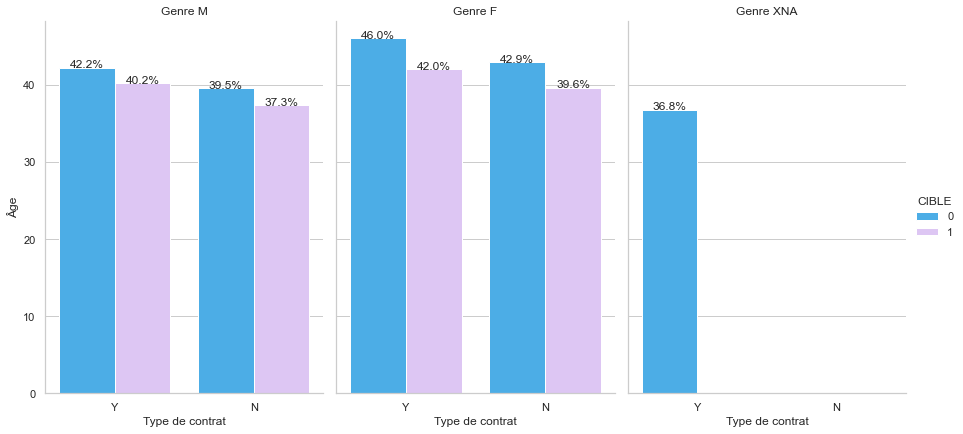

In [30]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(x="PROPRIETAIRE_BIEN_IMMO", y="AGE", hue="CIBLE", col="GENRE", data=df, kind="bar", ci=None, palette=custom_palette, height=6, aspect=0.7)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0: 
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height), ha="center")

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 300px;">
    <h2>
        <b>Relation Cible x Voiture</b>
    </h2>
</div>


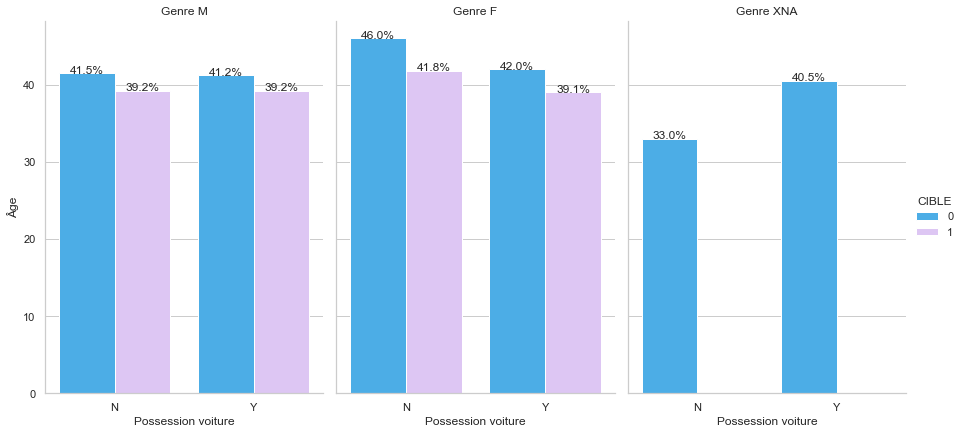

In [31]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(x="PROPRIETAIRE_VOITURE", y="AGE", hue="CIBLE", col="GENRE", data=df, kind="bar", ci=None, palette=custom_palette, height=6, aspect=0.7)

g.set_axis_labels("Possession voiture", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0: 
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height), ha="center")

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 500px;">
    <h2>
        <b>Relation Cible x Type de Contrat x Genre</b>
    </h2>
</div>


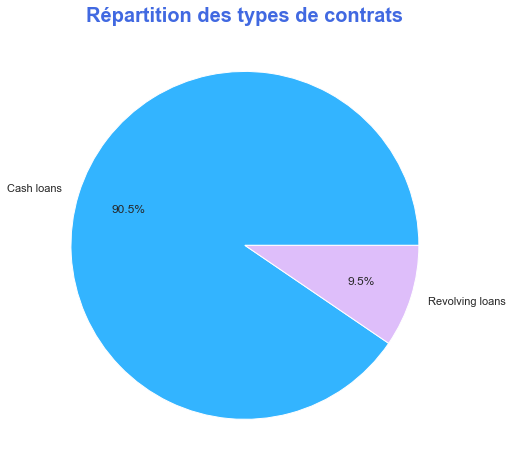

In [32]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df['TYPE_CONTRAT'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels= note_pie.index, colors=custom_palette,  autopct='%1.1f%%', pctdistance=0.7)
plt.title('Répartition des types de contrats', fontsize = 20, fontweight ='bold', color="RoyalBlue")
plt.show() 

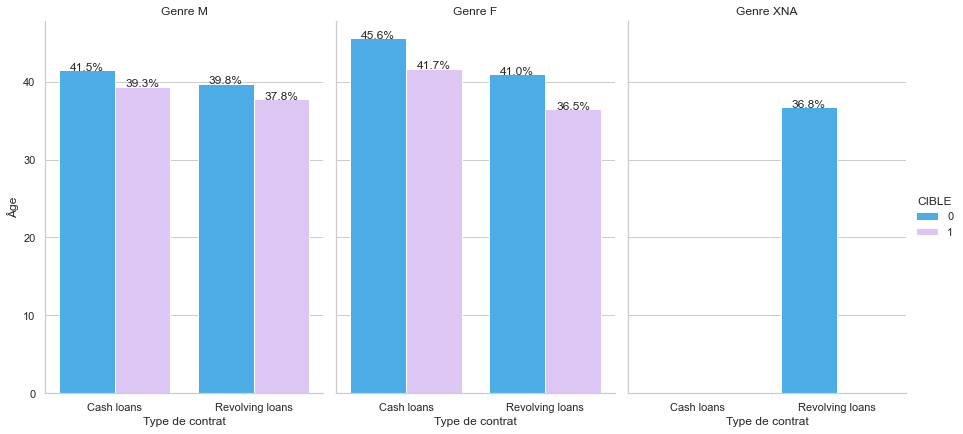

In [33]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(x="TYPE_CONTRAT", y="AGE", hue="CIBLE", col="GENRE", data=df, kind="bar", ci=None, palette=custom_palette, height=6, aspect=0.7)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0: 
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height, '{:.1f}%'.format(height), ha="center")

plt.show()

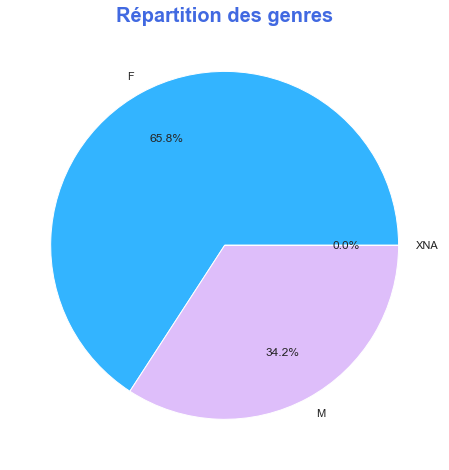

In [34]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df['GENRE'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels= note_pie.index, colors=custom_palette, autopct='%1.1f%%', pctdistance=0.7)
plt.title('Répartition des genres', fontsize = 20, fontweight ='bold', color="RoyalBlue")
plt.show() 

In [35]:
df['GENRE'].value_counts()

F      202448
M      105059
XNA         4
Name: GENRE, dtype: int64

In [36]:
df = df[df['GENRE'] != 'XNA']

<Figure size 720x720 with 0 Axes>

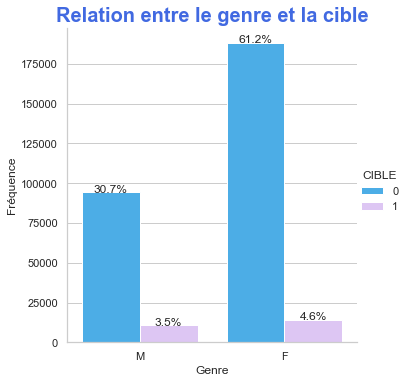

In [37]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

# Tracer le graphique catégoriel
ax =sns.catplot(x="GENRE", hue="CIBLE", data=df, kind="count", palette=custom_palette)

total = float(len(df))
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")
    
# Ajouter des titres et des étiquettes
plt.xlabel('Genre')
plt.ylabel('Fréquence')
plt.title('Relation entre le genre et la cible', fontsize = 20, fontweight ='bold', color="RoyalBlue")


# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Satut familial</b>
    </h2>
</div>


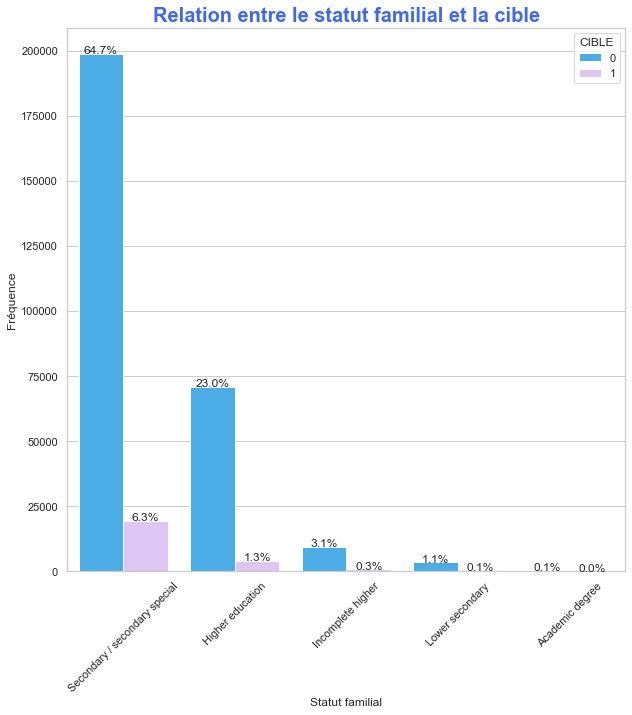

In [38]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="NIVEAU_EDUCATION", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

# Ajouter des titres et des étiquettes
plt.xlabel('Statut familial')
plt.ylabel('Fréquence')
plt.title('Relation entre le statut familial et la cible', fontsize=20, fontweight='bold', color="RoyalBlue")
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Type de revenus</b>
    </h2>
</div>


In [39]:
df['TYPE_REVENUS'].value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: TYPE_REVENUS, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


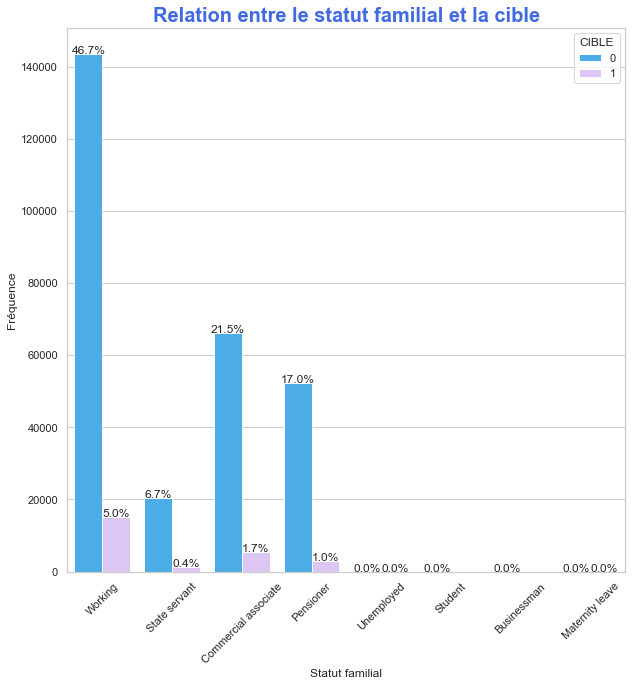

In [40]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="TYPE_REVENUS", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

# Ajouter des titres et des étiquettes
plt.xlabel('Statut familial')
plt.ylabel('Fréquence')
plt.title('Relation entre le statut familial et la cible', fontsize=20, fontweight='bold', color="RoyalBlue")
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

In [41]:
df.columns.tolist()

['TOTAL_CREDIT',
 'SOURCE_EXTERNE_3',
 'REVENU_TOTAL',
 'TYPE_REVENUS',
 'TYPE_CONTRAT',
 'CIBLE',
 'REMB_MENSUEL',
 'DATE_DEBUT_TRAVAIL',
 'JOURS_EMPLOI',
 'CNT_FAM_MEMBERS',
 'NIVEAU_EDUCATION',
 'ID_CLIENT',
 'STATUT_FAMILIAL',
 'MONTANT_PRIX_BIENS',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'SOURCE_EXTERNE_2',
 'DATE_NAISSANCE',
 'AGE',
 'GENRE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Export & Save</b>
    </h2>
</div>


In [42]:
df.to_csv('app_train_clean.csv', index=False)

Analyse bivariée en fonction de la cible
discribe(round.2) a chaque graph
+ distribution 
Conserver soit age soit date de naissance
regarder val aberrantes